In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import sys

In [5]:
from models.seir_movement import SEIR_Movement
from utils.generic import compute_regionwiseflow

In [9]:
regionwiseflow, districts = compute_regionwiseflow()
regionwiseflow

net_flow     ext_flow     population        mu
region date                                                        
Alibag 2020-03-20   17.000000    19.333333    5046.333333  0.002948
       2020-03-21   -7.000000    89.333333    5259.666667 -0.001416
       2020-03-22   -3.333333   -10.000000    5356.000000 -0.000738
       2020-03-23    3.000000    16.666667    5368.000000  0.000409
       2020-03-24   -2.666667    15.333333    5423.000000 -0.000491
...                       ...          ...            ...       ...
Vasai  2020-03-22  212.000000   -69.333333  106790.333333  0.001965
       2020-03-23   -9.666667  -344.666667  106929.333333 -0.000080
       2020-03-24   32.333333  -127.333333  106349.000000  0.000307
       2020-03-25   -5.000000  -122.666667  106491.333333 -0.000052
       2020-03-26  -97.500000 -1972.500000  108333.000000 -0.000930

[133 rows x 4 columns]

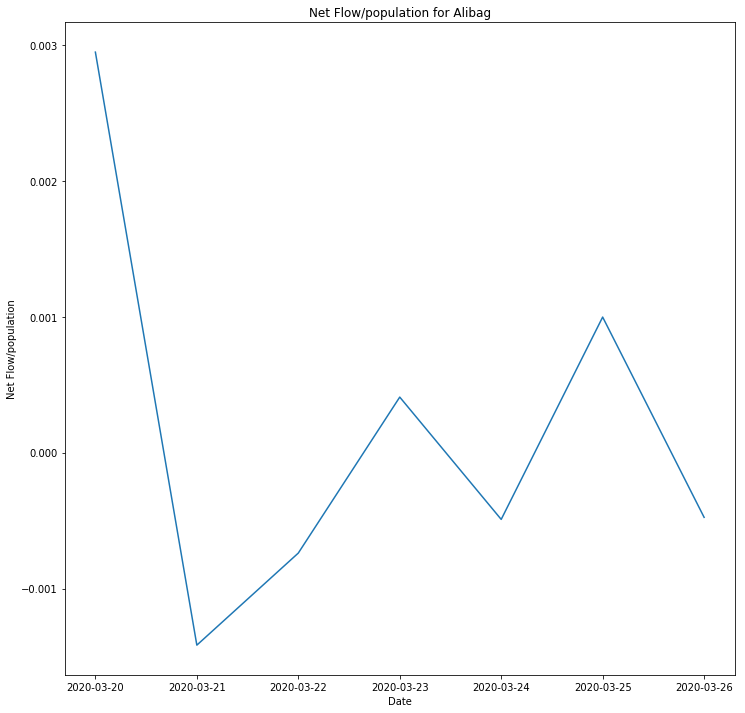

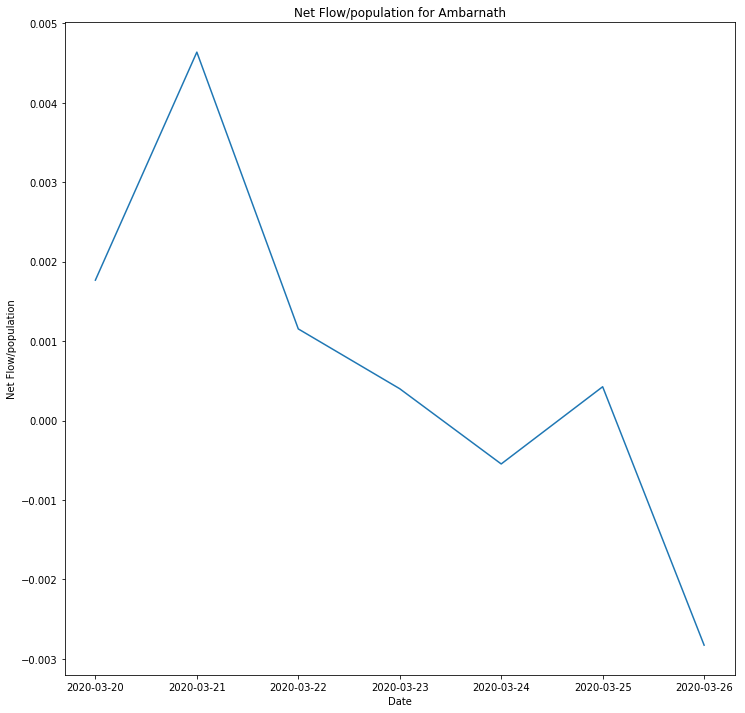

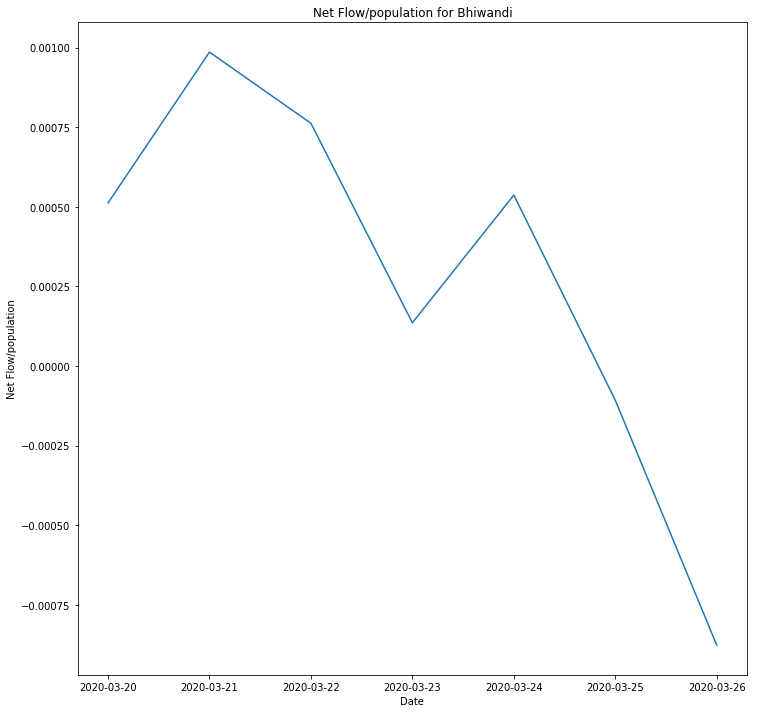

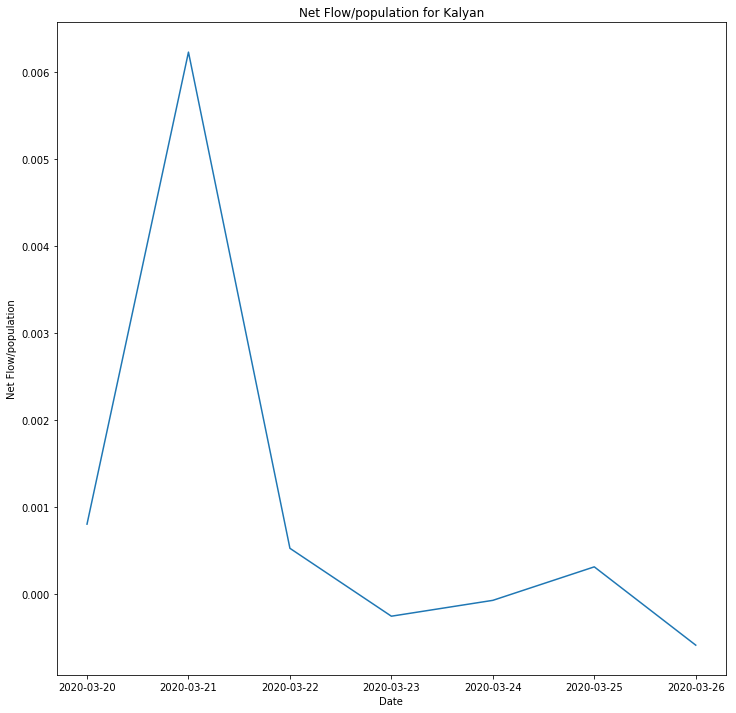

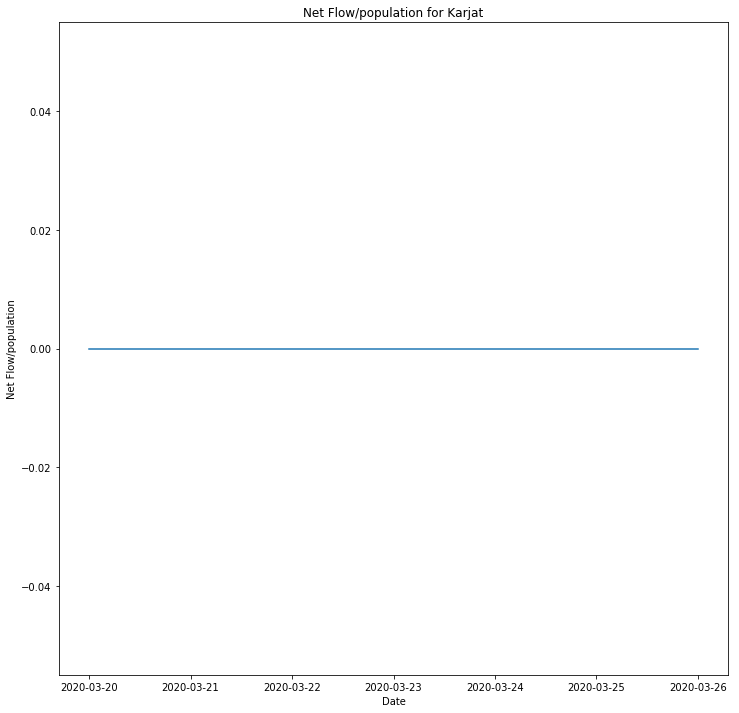

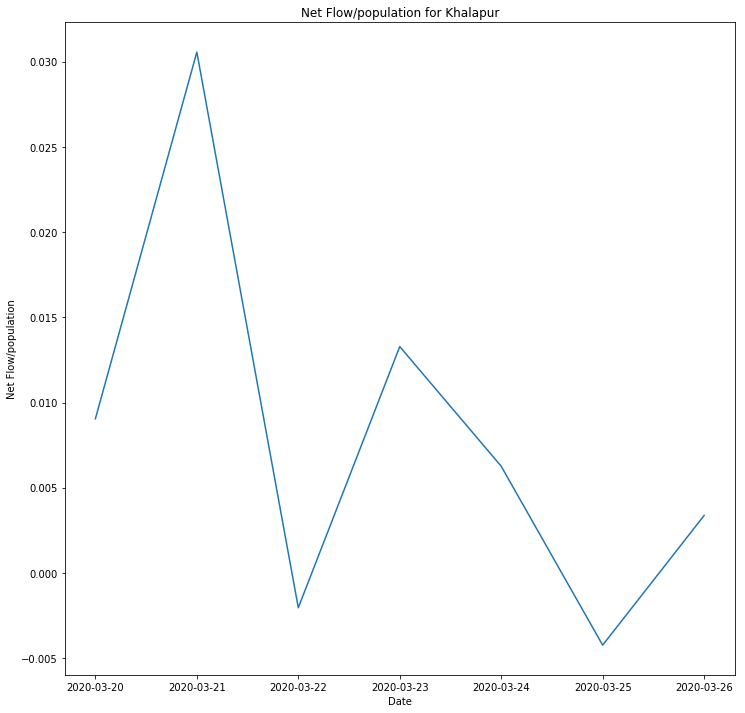

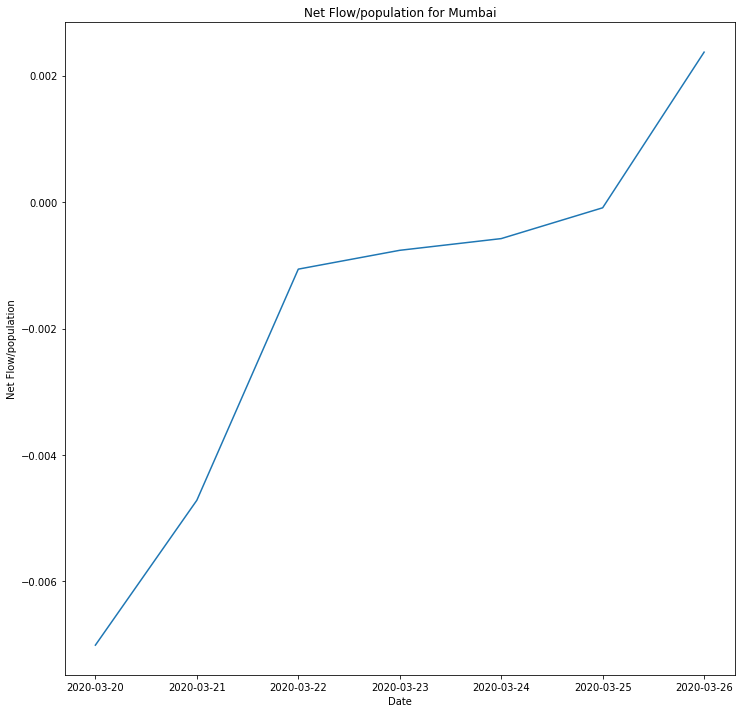

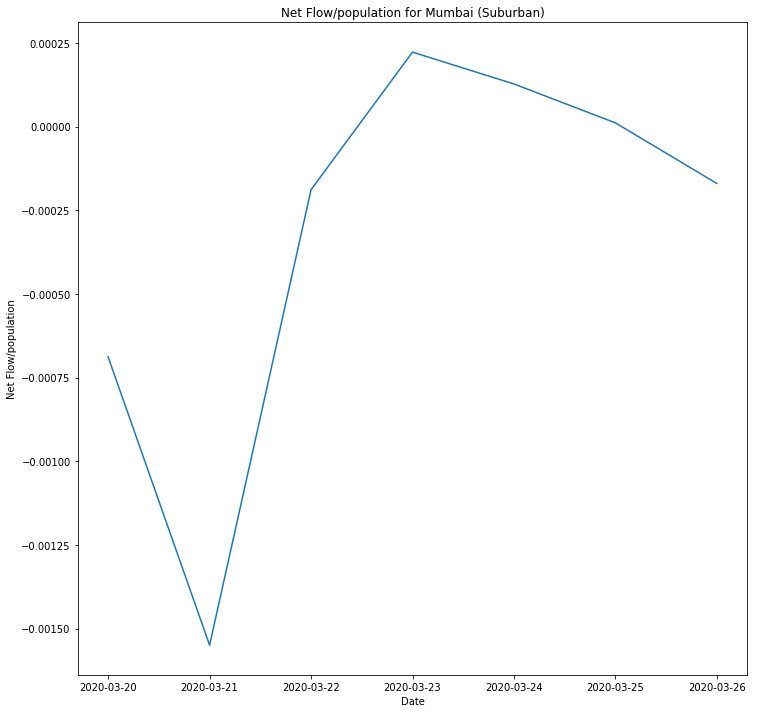

<Figure size 864x864 with 0 Axes>

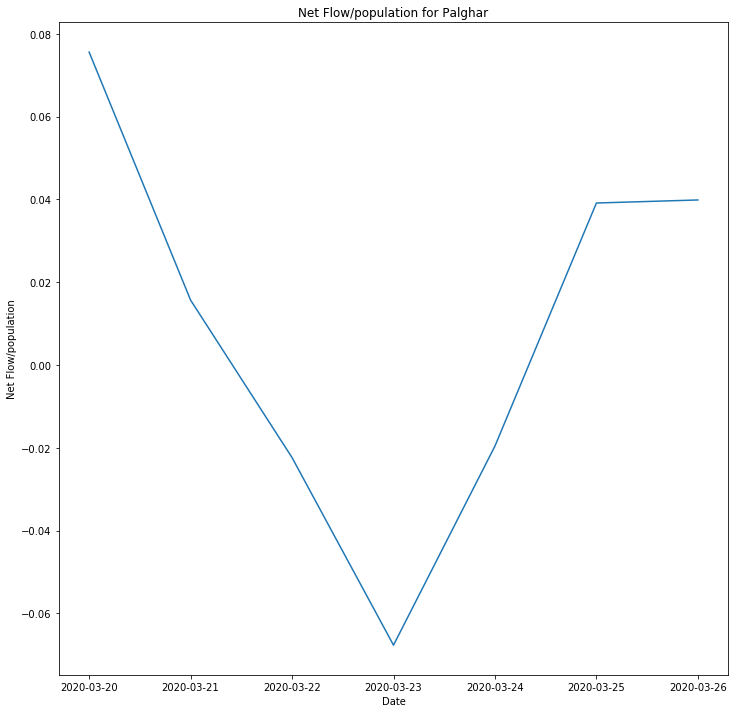

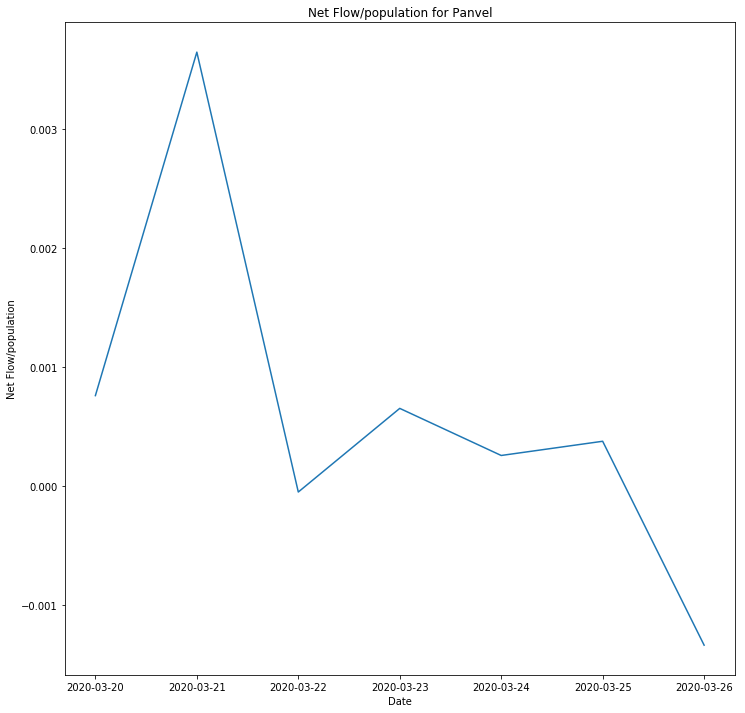

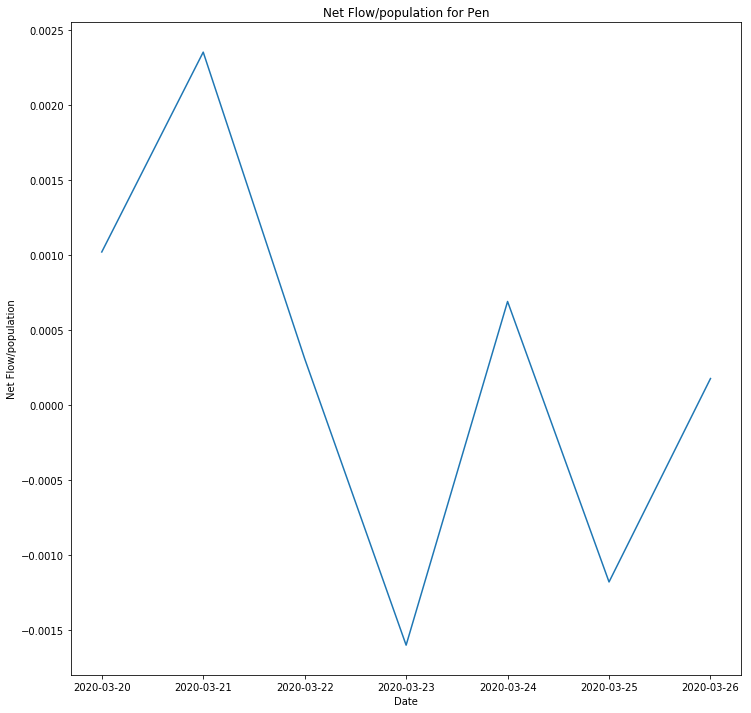

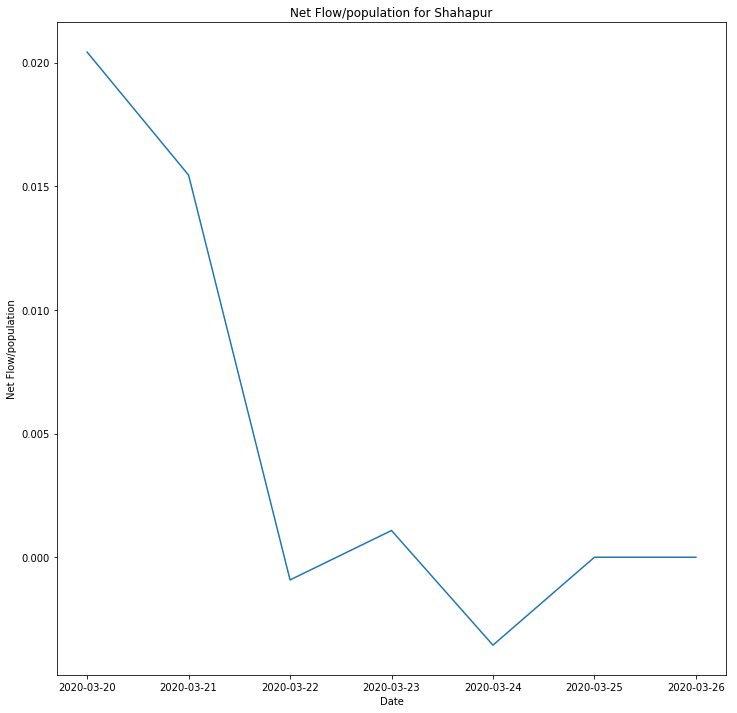

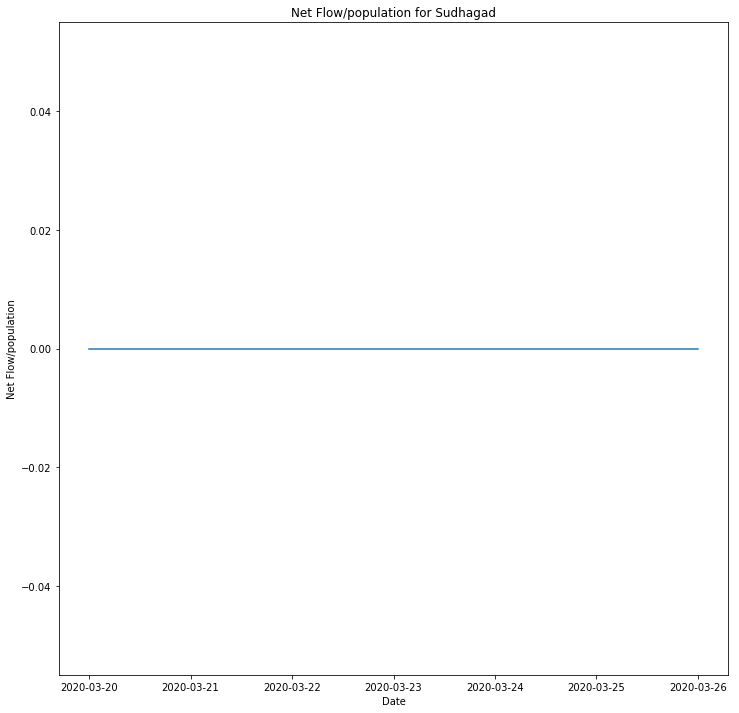

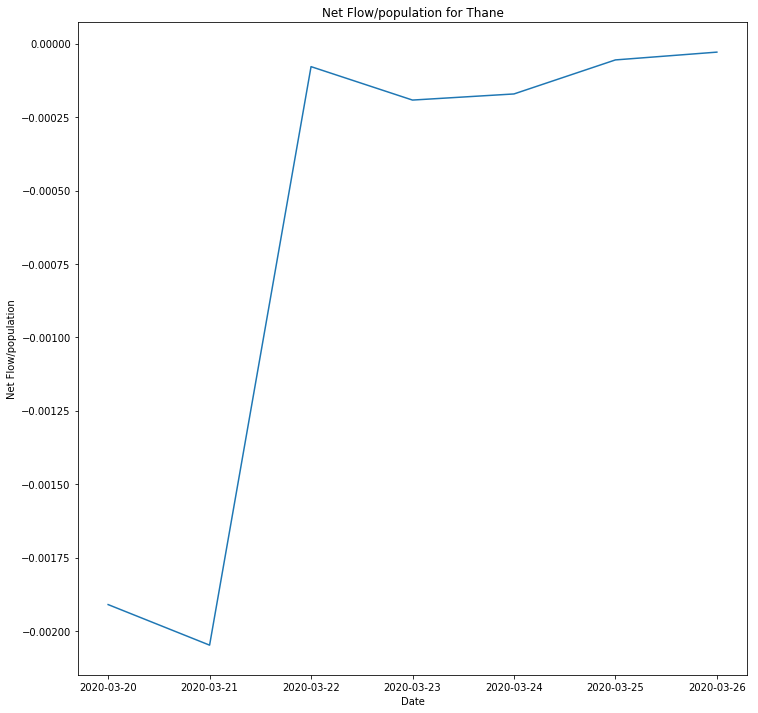

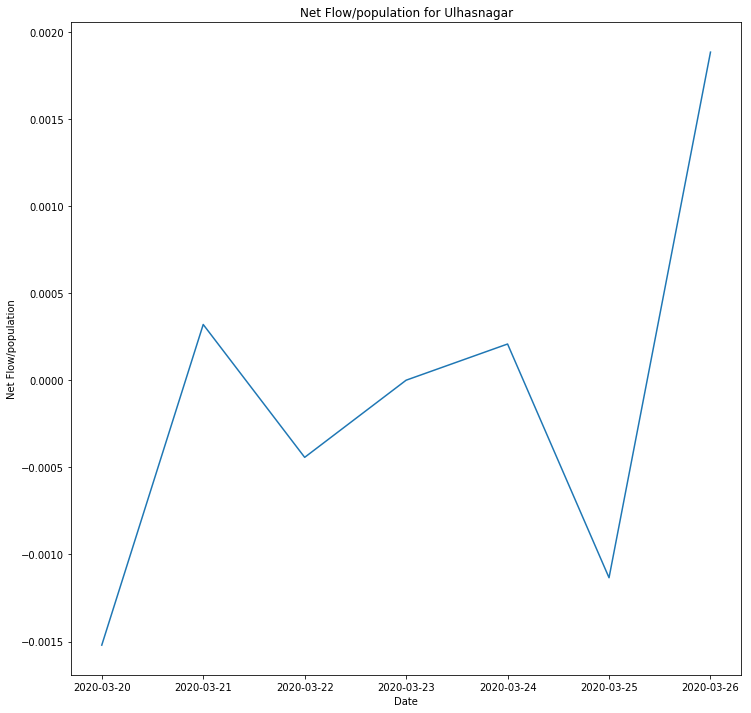

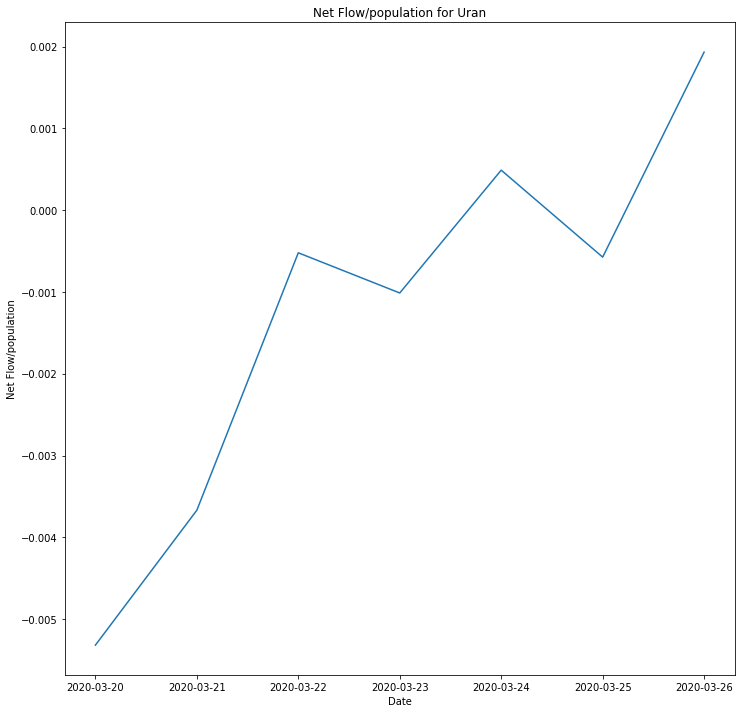

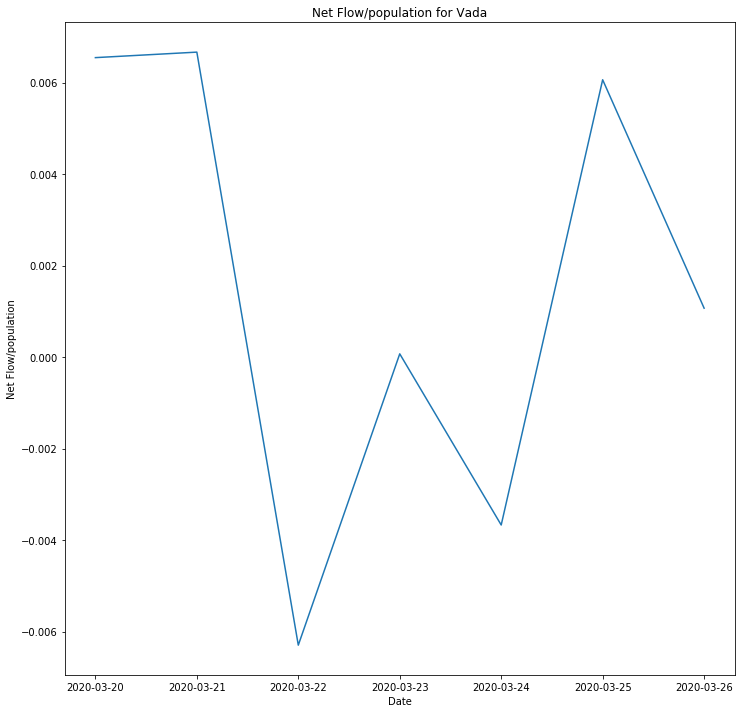

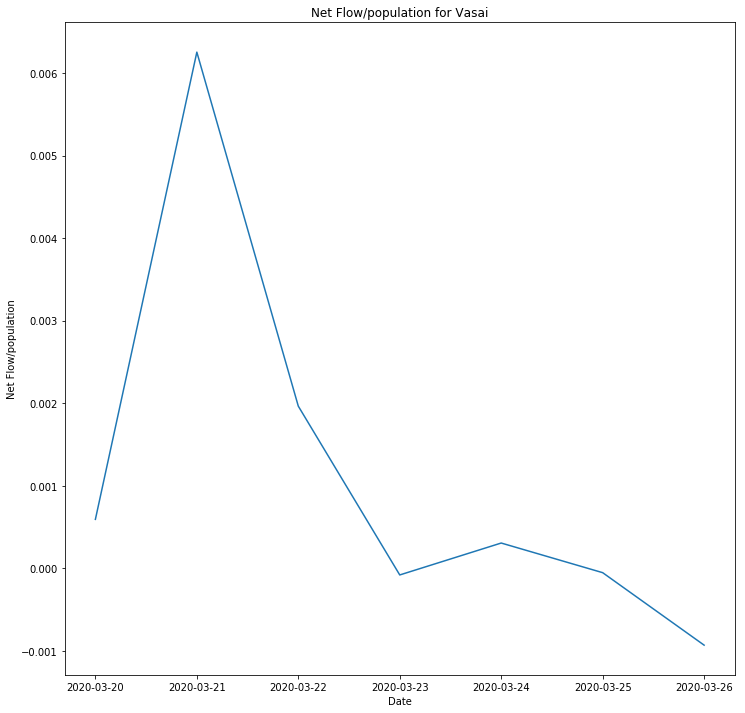

In [63]:
pd.plotting.register_matplotlib_converters()
for district in districts:
    plt.figure(figsize=(12, 12))
    if district == 'Murbad':
        continue
    plt.plot(regionwiseflow.loc[district, :].index, regionwiseflow.loc[district, 'mu'])
    plt.title('Net Flow/population for {}'.format(district))
    plt.xlabel('Date')
    plt.ylabel('Net Flow/population')
    plt.show()

In [93]:
R0 = 2.2 
T_inf = 2.9
T_trans = T_inf/R0
T_inc = 5.2
T_recov_mild = (14 - T_inf)
T_hosp = 5
T_recov_severe = (31.5 - T_inf)
T_death = 32
 
P_severe = 0.2
P_fatal = 0.02
P_mild = 1 - P_severe - P_fatal

N = 7e6
I0 = 1.0

# new_R0 = 0.74
# intervention_amount = R0/new_R0
intervention_day = 100
intervention_amount = 3

mu = 0.003

params = [mu, T_trans, T_inc, T_inf, T_recov_mild, T_hosp, T_recov_severe, T_death, 
          P_mild, P_severe, P_fatal, N, intervention_day, intervention_amount]

# S, E, I, R_mild, R_severe, R_severe_home, R_fatal, C, D
state_init_values = [(N - I0)/N, 0, I0/N, 0, 0, 0, 0, 0, 0]

In [94]:
solver = SEIR_Movement(params, state_init_values)
sol = solver.solve_ode(time_step=1)
states_int_array = (sol.y*N).astype('int')

In [95]:
E = states_int_array[1]
I = states_int_array[2]
H = states_int_array[5]
F = states_int_array[8]

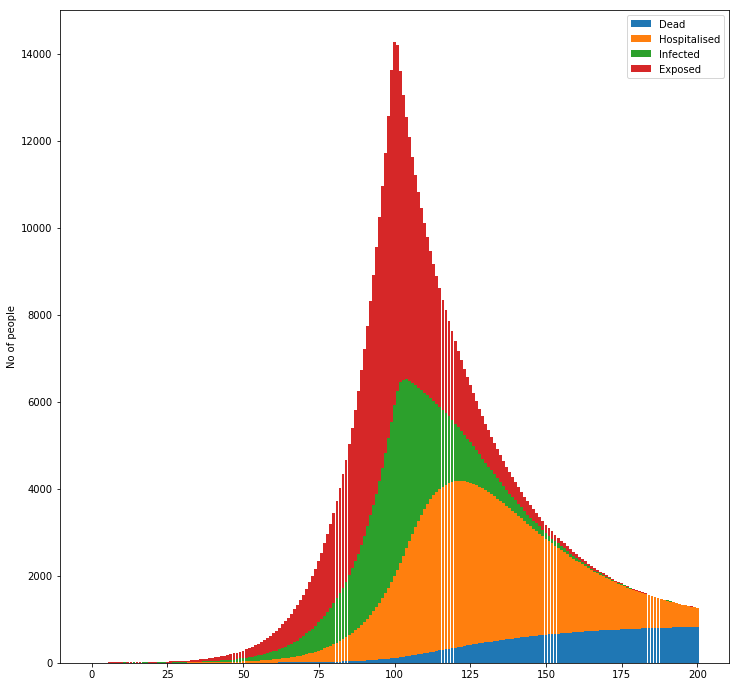

In [96]:
ind = sol.t    # the x locations for the groups
width = 0.95        # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(12, 12))
p1 = plt.bar(ind, F, width)
p2 = plt.bar(ind, H, width, bottom=F)
p3 = plt.bar(ind, I, width, bottom=H+F)
p4 = plt.bar(ind, E, width, bottom=I+H+F)
plt.ylabel('No of people')
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Dead', 'Hospitalised', 'Infected', 'Exposed'))

plt.show()